In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Visualisation of Prediction - New Blade

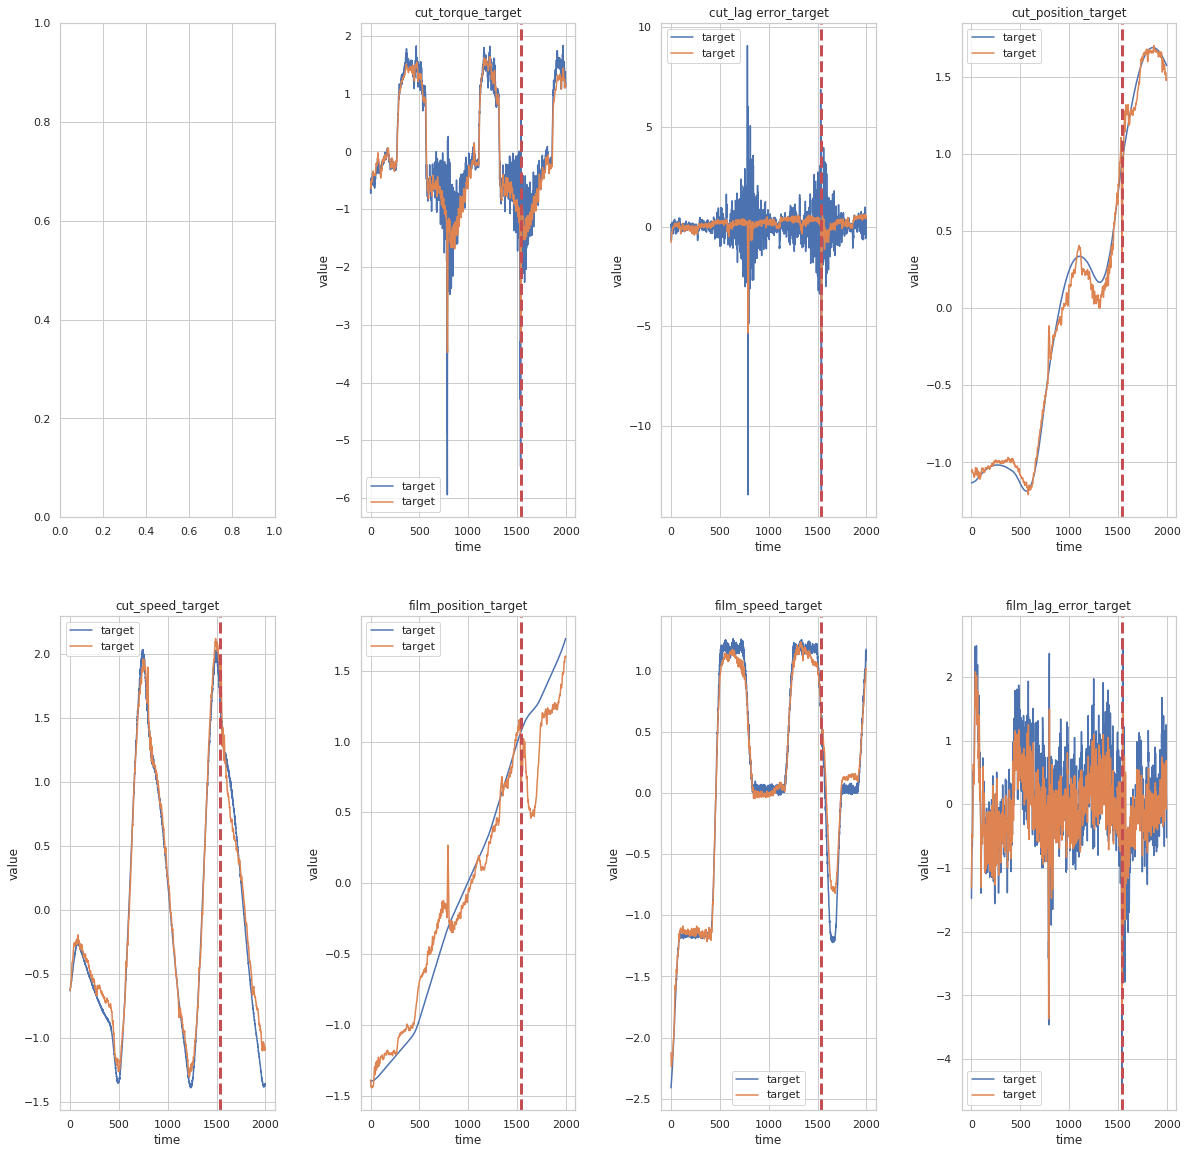

In [57]:
data_new_blade = pd.read_csv("./files/prediction_new_blade.csv", sep=";")
fig, axes = plt.subplots(2, 4, figsize=(20,20))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.lineplot(data=data_new_blade, x="timestamp", y=columns[i], ax=ax[i], label="target")
    sns.lineplot(data=data_new_blade, x="timestamp", y=columns[i+7], ax=ax[i], label="target")
    ax[i].axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
    #plt.text(1570, 2, 'validation data', fontsize=12)
    #plt.text(1300, 2, 'training data', fontsize=12)
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()

# Visualisation of Residuals
## Compute Residuals

In [58]:
# Create empty dataframe
columns_residual = ["timestamp", "cut_torque_residuas", "cut_lag_error_residual", "cut_position_residual", "cut_speed_residual", 
           "film_position_residual", "film_speed_residual", "film_lag_error_residual"]
columns_original = data_new_blade.columns
df = pd.DataFrame(columns=columns)
data_new_blade = pd.read_csv("./files/prediction_new_blade.csv", sep=";")
for i in range(1,8):
    df[columns_residual[i]] = data_new_blade[columns_original[i]] - data_new_blade[columns_original[i+7]]

df["timestamp"]=data_new_blade["timestamp"]
# Save dataframe as csv file
#df.to_csv("../visualisation/files/residual_new_blade.csv", sep=";", index=False)

## Residuals of LSTM

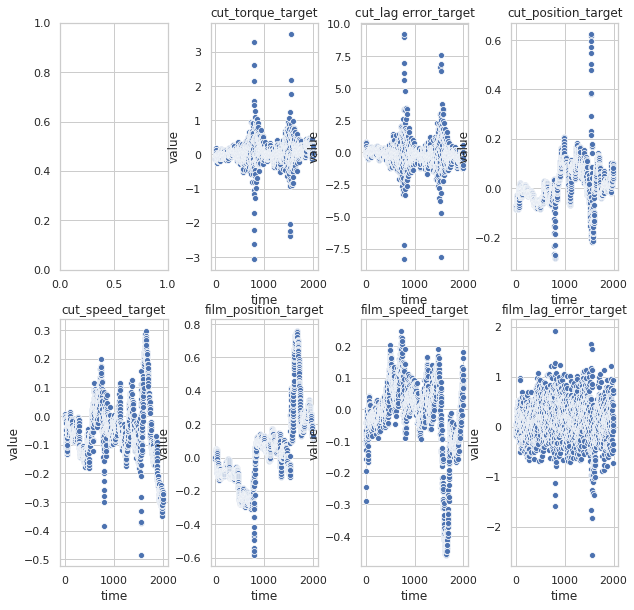

In [88]:
data_residuals = pd.read_csv("../visualisation/files/residual_new_blade.csv", sep=";")
fig, axes = plt.subplots(2, 4, figsize=(10,10))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.scatterplot(data=data_residuals, x="timestamp", y=data_residuals[data_residuals.columns[i]], ax=ax[i]) #scatter_kws={"s": 10})
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()

## Distribution of residuals

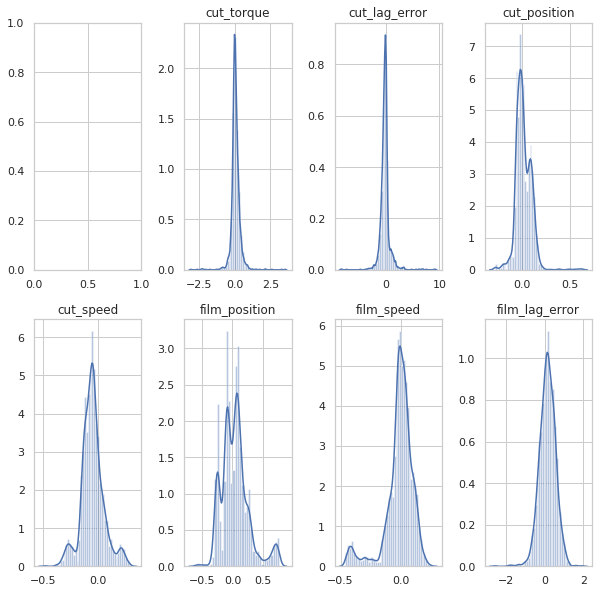

In [60]:
data_residuals = pd.read_csv("../visualisation/files/residual_new_blade.csv", sep=";")
columns= ["timestamp", "cut_torque", "cut_lag_error", "cut_position", "cut_speed", 
           "film_position", "film_speed", "film_lag_error"]
fig, axes = plt.subplots(2, 4, figsize=(10,10))
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    sns.distplot(data_residuals.iloc[:,i], ax=ax[i])
    ax[i].set(title=columns[i])
    ax[i].set(xlabel=' ')
plt.show()

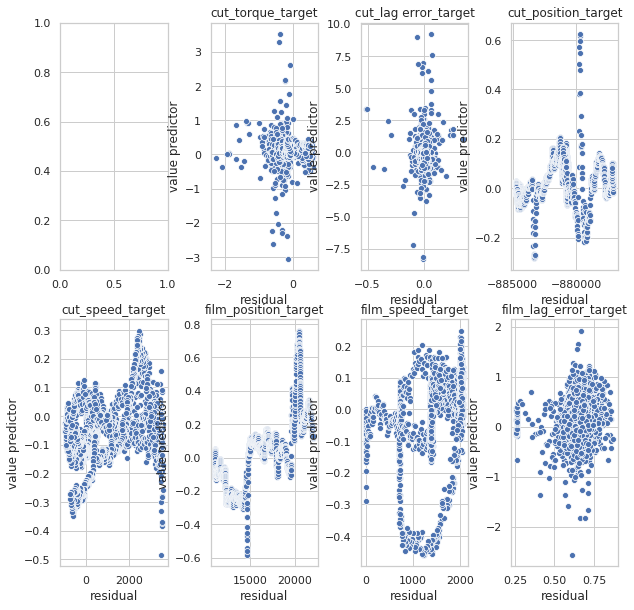

In [81]:
data_new_blade = pd.read_csv("./files/prediction_new_blade.csv", sep=";")
input_data = pd.read_csv("../../data/vega_shrinkwrapper_original/NewBlade/NewBlade001.csv", sep=",")
columns_input = input_data.columns
fig, axes = plt.subplots(2, 4, figsize=(10,10))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    residual = data_new_blade[columns[i]] - data_new_blade[columns[i+7]]
    sns.scatterplot(x=input_data[columns_input[i]], y=residual, ax=ax[i])
    ax[i].set(xlabel='residual', ylabel='value predictor')
    ax[i].set(title=columns[i])
plt.show()

## Autocorrelation of residuals

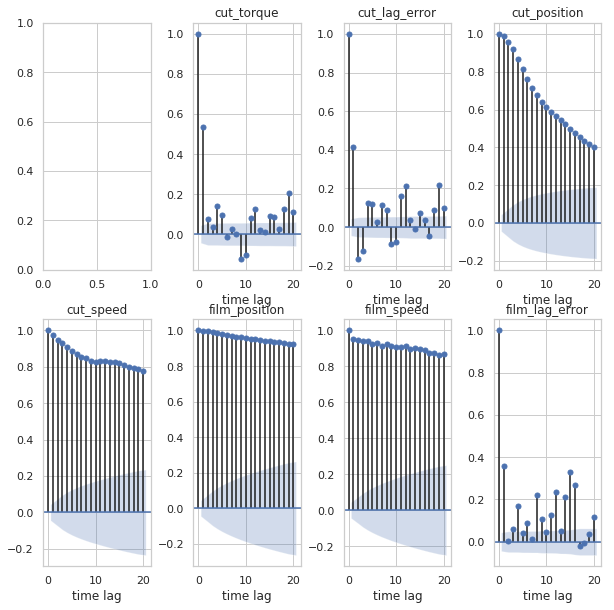

In [63]:
fig, axes = plt.subplots(2, 4, figsize=(10,10))
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    plot_acf(data_residuals.iloc[:,i], lags=20, ax=ax[i])
    ax[i].set_title(columns[i])
    ax[i].set_xlabel('time lag')
plt.show()

## Worn Blade

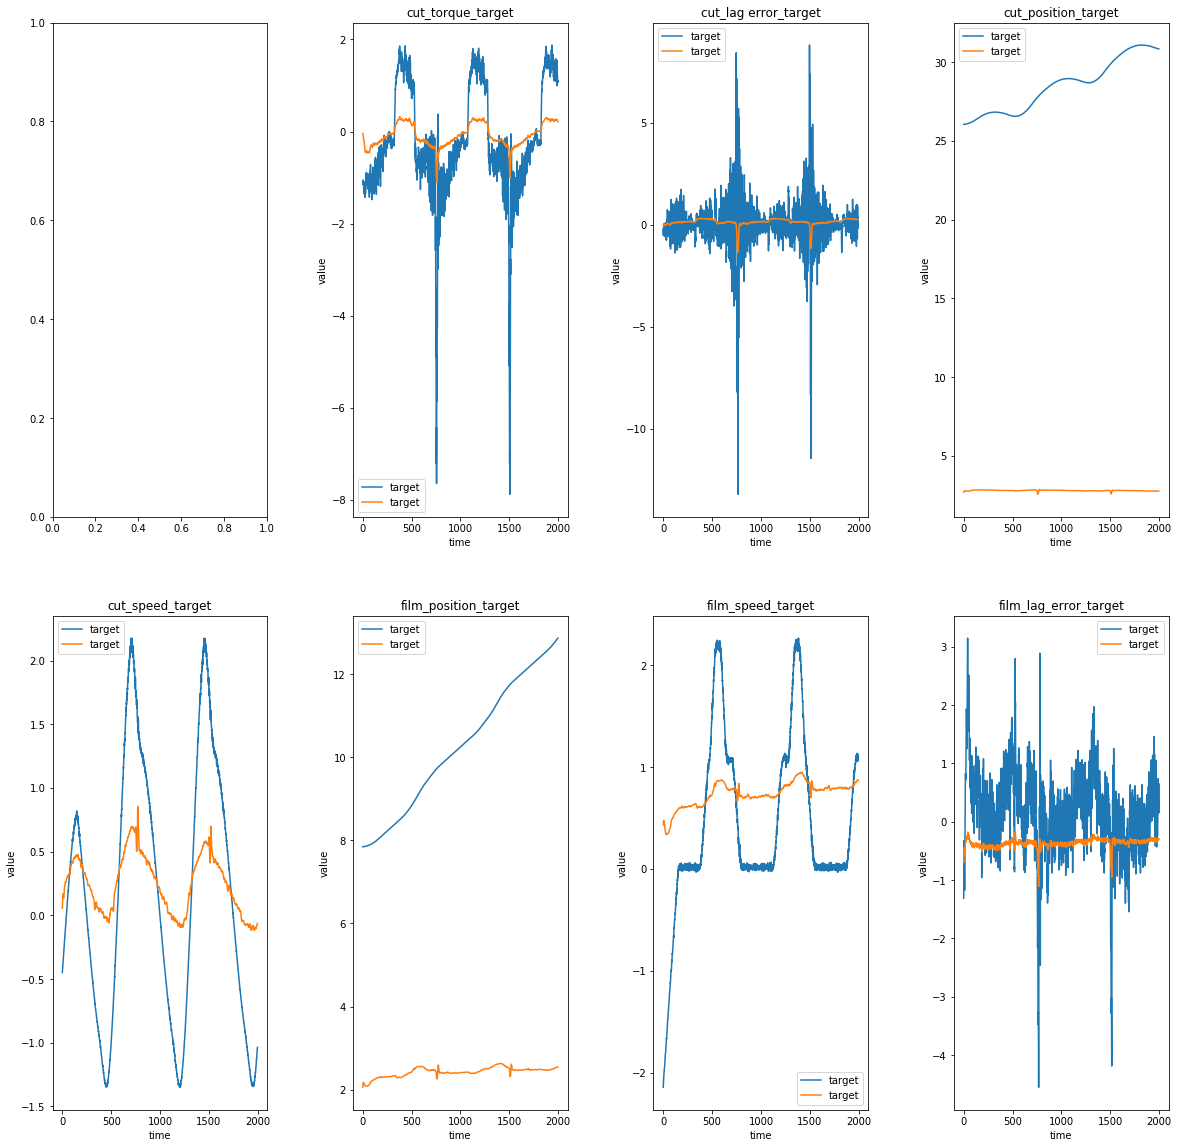

In [22]:
data_worn_blade = pd.read_csv("./files/prediction_worn_blade.csv", sep=";")
fig, axes = plt.subplots(2, 4, figsize=(20,20))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.lineplot(data=data_worn_blade, x="timestamp", y=columns[i], ax=ax[i], label="target")
    sns.lineplot(data=data_worn_blade, x="timestamp", y=columns[i+7], ax=ax[i], label="target")
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()

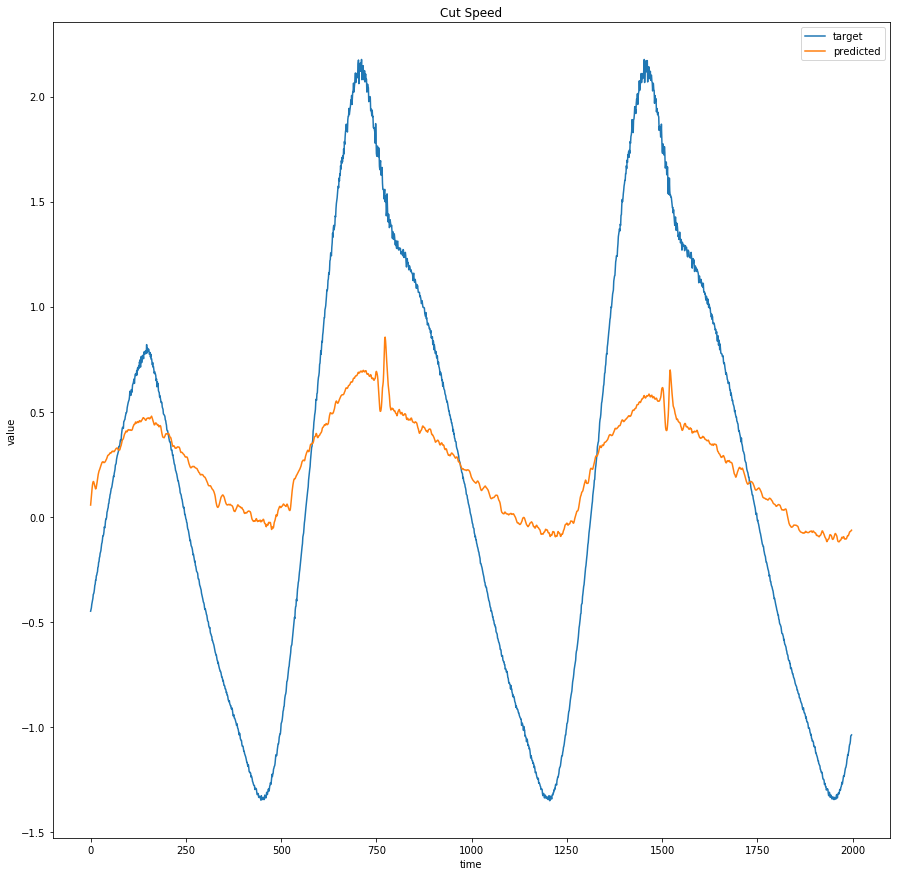

In [17]:
f, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_target", ax=ax, label="target")
sns.lineplot(data=data_new_blade, x="timestamp", y="cut_speed_predicted", ax=ax, label="predicted")
ax.set(xlabel='time', ylabel='value')
ax.set(title="Cut Speed")
plt.show()